In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../')
from M1S_tools import *

plt.jet()

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685


<Figure size 640x480 with 0 Axes>

### Execute one out of the 3 cells below

In [2]:
#Start of -20 arcsec move 1733249807
#in ML CS, this moves from 0 to +20"
start_time = 1733249800
end_time = 1733249837
duration = end_time - start_time

In [40]:
#Start of +20 arcsec move 1733249837
#in ML CS, this moves from +20" to -20"
start_time = 1733249837
end_time = 1733249867
duration = end_time - start_time

In [37]:
#Start of 0 arcsec move 1733249867 
#in ML CS, this moves from -20" to 0.
start_time = 1733249867
end_time = 1733249900
duration = end_time - start_time

### Extract data from DB

In [41]:
mirror_z, tt = getDBData(start_time,'m1_s1_support_ctrl/s/mirror_position/value', duration_in_s=duration, samples=100)
sa_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=duration, samples=100)
bend_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_bending_force/value', duration_in_s=duration, samples=100)
g_load, tt = getDBData(start_time,'m1_s1_support_ctrl/s/gravity_load/value', duration_in_s=duration, samples=100)
ofl6, tt = getDBData(start_time,'m1_s1_support_ctrl/s/ofl_correction/value', duration_in_s=duration, samples=100)
hold_idx = abs(mirror_z[:,2])<20e-6  #select times where mirror was fully raised. FIRST TIME, 20 MICRONS
sa_force_z_total = np.sum(sa_force[:,:,2], axis=1)
hold_force = sa_force[hold_idx]
bend_force = bend_force[hold_idx]
hold_force_per_puck = np.mean(hold_force, axis=0)[:,2]/npuck
bend_force_per_puck = np.mean(bend_force, axis=0)[:,2]/npuck

m1_s1_support_ctrl/s/mirror_position/value
2024-12-03 11:17:17  duration =  30  s
(100, 6)
m1_s1_support_ctrl/s/sa_force/value
2024-12-03 11:17:17  duration =  30  s
(100, 170, 3)
m1_s1_support_ctrl/s/sa_bending_force/value
2024-12-03 11:17:17  duration =  30  s
(100, 170, 3)
m1_s1_support_ctrl/s/gravity_load/value
2024-12-03 11:17:17  duration =  30  s
(100, 6)
m1_s1_support_ctrl/s/ofl_correction/value
2024-12-03 11:17:17  duration =  30  s
(100, 6)


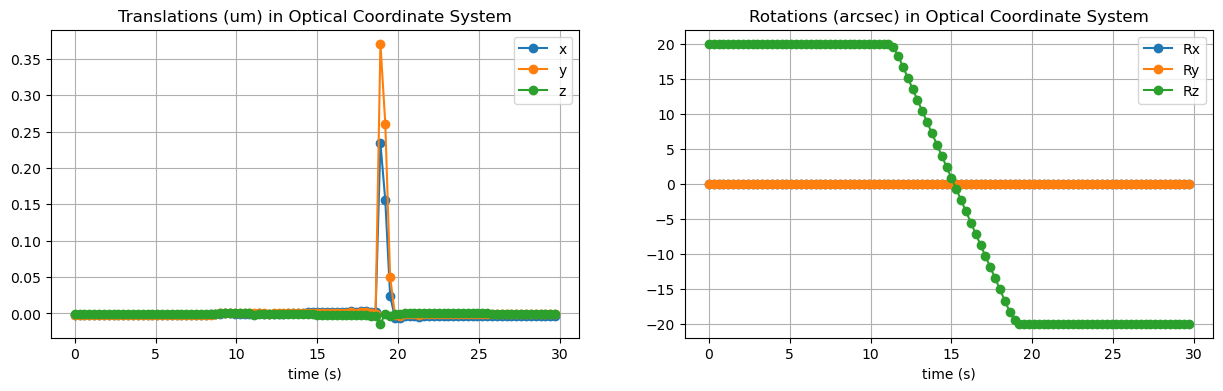

In [42]:
plotRB(mirror_z, length_unit='um', angle_unit='arcsec')

In [32]:
hp_posi, tt = getDBData(start_time,'m1_s1_support_ctrl/s/hp_position/value', duration_in_s=duration, samples=100)

m1_s1_support_ctrl/s/hp_position/value
2024-12-03 11:17:17  duration =  30  s
(100, 6)


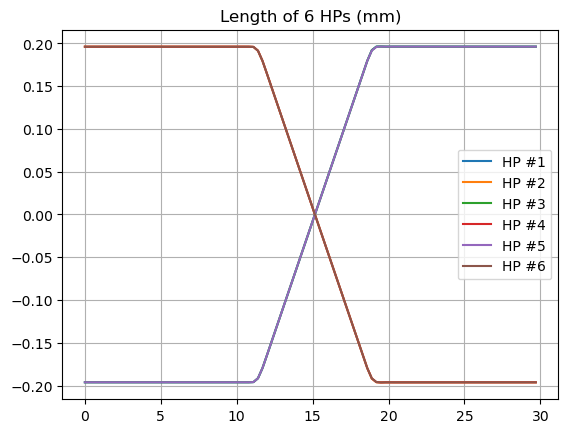

In [33]:
for i in range(6):
    plt.plot(tt-tt[0], hp_posi[:,i]*1e3, label='HP #%d'%(i+1))
plt.legend()
plt.grid()
plt.title('Length of 6 HPs (mm)');

In [34]:
#we extracted variables in ML CS, but the matrix works in M1B
#transpose() makes time the 2nd dimension, so that we can multiply as (6x6) * (6xTime)
derived_mirror_position = HP2XYZ_position@ mlcs_to_m1b(hp_posi).transpose()
#then back to (Time x 6) format via transpose(), and back to ML CS
derived_mirror_position = m1b_to_mlcs(derived_mirror_position.transpose())

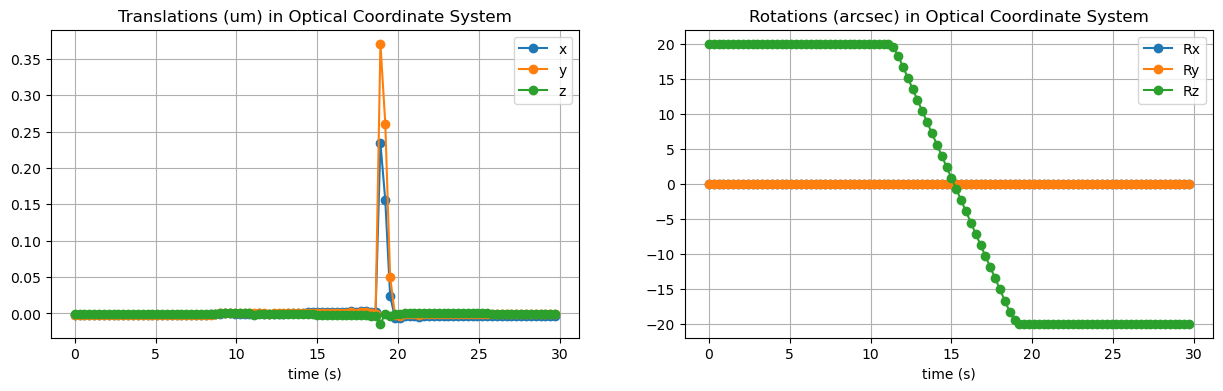

In [36]:
plotRB(derived_mirror_position, length_unit='um', angle_unit='arcsec')